# **Project 2**, APS1070 Fall 2021
**Anomaly Detection Algorithm using Gaussian Mixture Model [13 Marks]**

**Deadline: OCT 22, 9 PM**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Zhaowei Li
*   Student Number: 1007911994

##**Part 1: Getting started [1.5 Marks]**

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? 284807 **[0.1]**
* What features in the dataset are present aside from the 28 main features?  Time, Amount, Class **[0.1]**
* Which column contains the targets? Class **[0.1]**
* To what do the target values correspond? 0 means not a fraud, and 1 means a fraud. **[0.1]**

In [41]:
pip install wget

In [42]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (1).gz'

In [43]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [45]:
### YOUR CODE HERE ###
print(df.shape, "\n")

print(df.info(),"\n")

print(set(df["Class"]))

df

(284807, 31) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0



* What is the percentage of entries in the dataset for each class? 

Percentage of 0 is 99.827%.

Percentage of 1 is 0.173%.

 **[0.1]**
* Is this data considered balanced or unbalanced? Why is this the case?

The data is considered unbalanced, because the entries of 0 is overwhelmingly bigger than the entries of 0 which only occupies 0.173% of the total entries.

 **[0.1]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? 

The balance is important, since imbalance on training data can cause false measure on performance of testing on new data.

If we use imbalanced training data to train KNN classifier, the model will give overly high or low performance on new data depends on the majority of class in new data.

 **[0.2]**



In [46]:
### YOUR CODE HERE ###
class_lst = list(df["Class"])

fra_num = 0
nfra_num = 0

for i in class_lst:
  if i == 0:
    nfra_num += 1
  else:
    fra_num += 1

nfra_per = nfra_num/(nfra_num+fra_num)
fra_per = fra_num/(nfra_num+fra_num)

print("Percentage of 0 is", 100*nfra_per,"%", "\n",
      "Percentage of 1 is", 100*fra_per,"%")



Percentage of 0 is 99.82725143693798 % 
 Percentage of 1 is 0.1727485630620034 %


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [47]:
### Split the data  ###
from sklearn.model_selection import train_test_split

feature_data = df.iloc[:,1:29]
target_data = df["Class"]

X_train, X_val, X_test, y_train, y_val, y_test = 0, 0, 0, 0, 0, 0

X_alltrain, X_test, y_alltrain, y_test = train_test_split(feature_data, target_data, test_size = 0.15 , random_state=0)

X_train, X_val, y_train, y_val = train_test_split(X_alltrain, y_alltrain, test_size = 0.15/(1-0.15) , random_state=0)



Now, let's take a look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

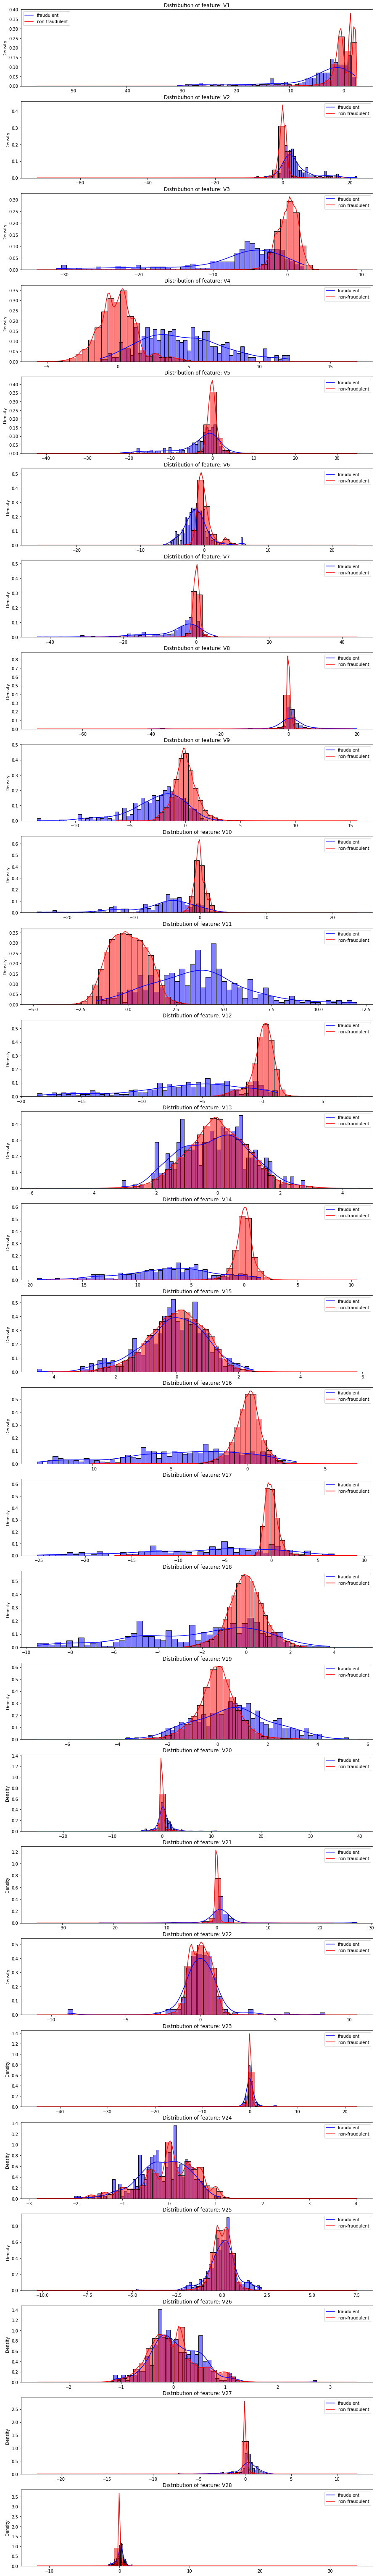

In [48]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**

These graphs can be helpful in providing us the information of which feature is more able to distinguish the difference of nonfraudulent and fraudulent transaction by seeing how different their distributions are.

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**. 

Please note that we **only use `V` features** in our model.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. 
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table. 
  4. Find the best 3 features to distinguish fraudulent transactions from non-fraudulent transactions based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]**

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a. 
 2. Compute AUC and F1 score when you fit a Gaussian **only on non-fraudulent transactions** (instead of all the transactions).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]**





In [49]:
### YOUR CODE HERE ###

#a
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score

gm_sin = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)

auc_sin_tr_lst = list() 
auc_sin_val_lst = list() 

for i in X_train.columns:
  re_X_train = np.array(X_train[i]).reshape(-1,1)
  re_X_val = np.array(X_val[i]).reshape(-1,1)
  gm_sin.fit(re_X_train)
  p_gm_sin_tr = gm_sin.score_samples(re_X_train)
  p_gm_sin_val = gm_sin.score_samples(re_X_val)
  auc_sin_tr = roc_auc_score(y_train, 1-p_gm_sin_tr)
  auc_sin_val = roc_auc_score(y_val, 1-p_gm_sin_val)

  auc_sin_tr_lst.append(auc_sin_tr)
  auc_sin_val_lst.append(auc_sin_val)

auc_sin_dct = {"Feature": list(X_train.columns), "AUC of training set": auc_sin_tr_lst, "AUC of validation set": auc_sin_val_lst}
auc_sin_df = pd.DataFrame(data = auc_sin_dct)

auc_sin_df

,Feature,AUC of training set,AUC of validation set
0,V1,0.704715,0.731833
1,V2,0.848104,0.837961
2,V3,0.880042,0.832369
3,V4,0.894416,0.871487
4,V5,0.760907,0.816581
5,V6,0.734653,0.721507
6,V7,0.862982,0.872639
7,V8,0.772515,0.828098
8,V9,0.799795,0.820999
9,V10,0.911624,0.914375


In [50]:
auc_sin_df_sorted = auc_sin_df.sort_values(by=["AUC of validation set"], ascending=False)

print(auc_sin_df_sorted[0:3],"\n\n")

print("The best 3 features are V14, V12 and V17.")

   Feature  AUC of training set  AUC of validation set
13     V14             0.949740               0.955297
11     V12             0.912838               0.928006
16     V17             0.927538               0.925703 


The best 3 features are V14, V12 and V17.


In [51]:
from sklearn.metrics import f1_score, roc_curve


for i in ["V14", "V12", "V17"]:
  re_X_train = np.array(X_train[i]).reshape(-1,1)
  re_X_val = np.array(X_val[i]).reshape(-1,1)
  gm_sin.fit(re_X_train)
  p_gm_sin_val = gm_sin.score_samples(re_X_val)
  
  fone_score_lst = list()
  thre_lst = list()

  for t in range(1, len(p_gm_sin_val), int(len(p_gm_sin_val)/500)):
    mn_gm = sorted(p_gm_sin_val)[t]
    fone_score = f1_score(y_val, p_gm_sin_val < mn_gm)
    fone_score_lst.append(fone_score)
    thre_lst.append(mn_gm)
  
  ix = np.argmax(np.array(fone_score_lst))
  print('For', i ,': Best Threshold=%f, F1 score=%.3f' % (thre_lst[ix], fone_score_lst[ix]))



For V14 : Best Threshold=-16.041032, F1 score=0.577
For V12 : Best Threshold=-8.833314, F1 score=0.497
For V17 : Best Threshold=-13.269702, F1 score=0.550


The Big O notation is O(n^2).

In [52]:
#b

fra_loc_tr = np.where(np.array(y_train) == 1)

X_train_nonfra = np.delete(np.array(X_train),list(fra_loc_tr[0]),0)

X_train_nonfra = pd.DataFrame(X_train_nonfra, columns=X_train.columns)


for i in ["V14", "V12", "V17"]:
  re_X_train = np.array(X_train_nonfra[i]).reshape(-1,1)
  re_X_val = np.array(X_val[i]).reshape(-1,1)
  gm_sin.fit(re_X_train)
  p_gm_sin_val = gm_sin.score_samples(re_X_val)
  
  fone_score_lst = list()
  thre_lst = list()

  for t in range(1, len(p_gm_sin_val), int(len(p_gm_sin_val)/500)):
    mn_gm = sorted(p_gm_sin_val)[t]
    fone_score = f1_score(y_val, p_gm_sin_val < mn_gm)
    fone_score_lst.append(fone_score)
    thre_lst.append(mn_gm)
  
  ix = np.argmax(np.array(fone_score_lst))
  print('For', i ,': Best Threshold=%f, F1 score=%.3f' % (thre_lst[ix], fone_score_lst[ix]))

For V14 : Best Threshold=-18.215320, F1 score=0.577
For V12 : Best Threshold=-9.756525, F1 score=0.497
For V17 : Best Threshold=-16.727633, F1 score=0.550


The results are similar since the non-fraudulent transactions occurs as the majority of the dataset.

## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components.

  a. 2D plot:
 1. Pick two features (say, f1 and f2). 
 2. Scatter plot (plt.scatter) those features on a figure (f1 on the x-axis and f2 on the y-axis). 
 3. Color the data points based on their class (non-fraudulent blue and fraudulent red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on valid transactions). Explain.  **[0.25]**
 5. Fit your Gaussian model on all the data points. 
 6. Compute AUC on both training and validation sets 
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





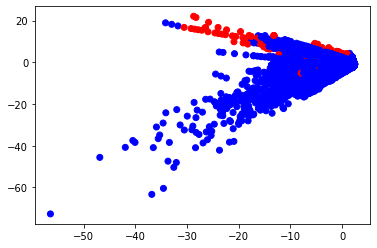



Only 1 Gaussian component is nedded to fit the data, because valid transactions are only able to form one cluster while invalid transactions are too few to form one. 


   AUC of training set  AUC of validation set
0             0.852475               0.854081 


For ['V1', 'V2'] : Best Threshold=-44.299937, F1 score=0.107




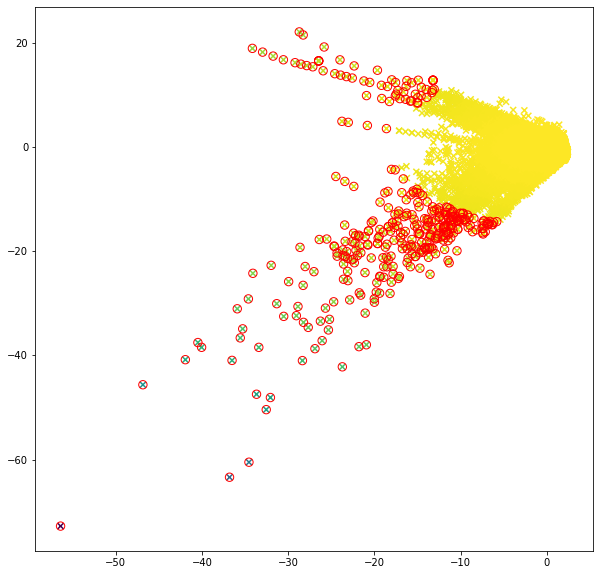

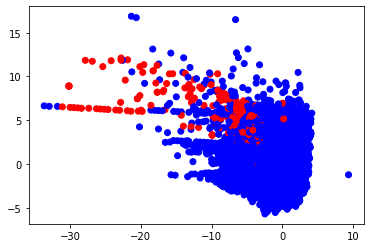



Only 1 Gaussian component is nedded to fit the data, because valid transactions are only able to form one cluster while invalid transactions are too few to form one. 


   AUC of training set  AUC of validation set
0             0.932242               0.882847 


For ['V3', 'V4'] : Best Threshold=-17.805381, F1 score=0.322




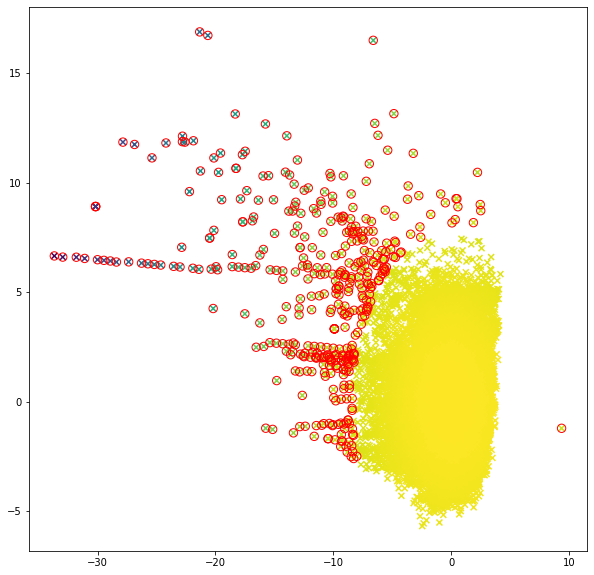

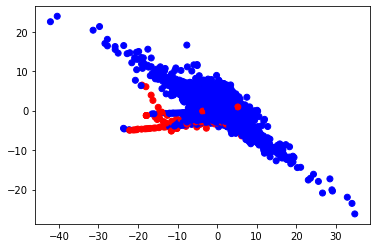



Only 1 Gaussian component is nedded to fit the data, because valid transactions are only able to form one cluster while invalid transactions are too few to form one. 


   AUC of training set  AUC of validation set
0             0.810967               0.809986 


For ['V5', 'V6'] : Best Threshold=-32.823802, F1 score=0.161




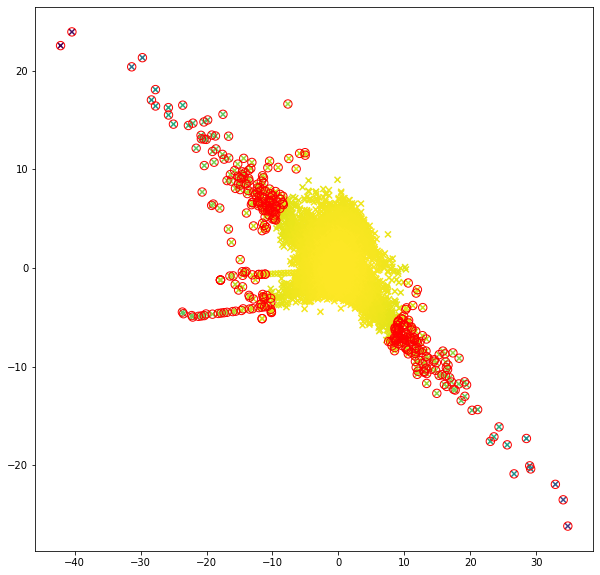

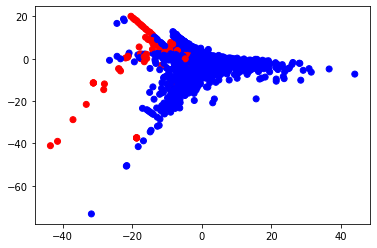



Only 1 Gaussian component is nedded to fit the data, because valid transactions are only able to form one cluster while invalid transactions are too few to form one. 


   AUC of training set  AUC of validation set
0             0.855444               0.866824 


For ['V7', 'V8'] : Best Threshold=-59.521617, F1 score=0.188




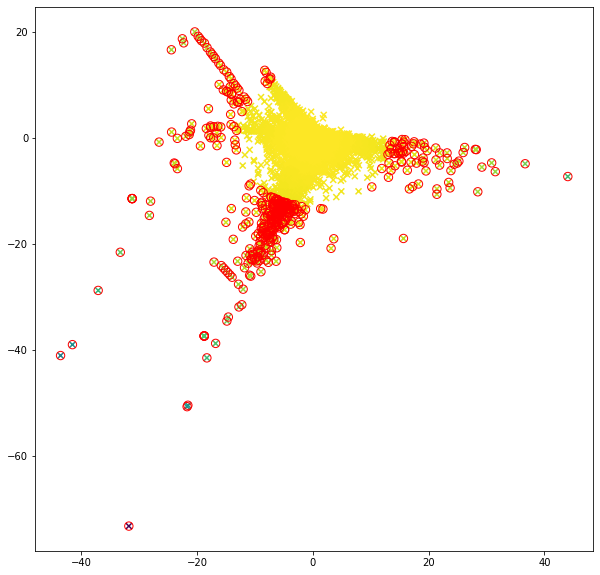

In [53]:
### YOUR CODE HERE ###

pair_lst = [["V1","V2"],["V3","V4"],["V5","V6"],["V7","V8"]]


color = np.array(['b','r'])

for i in pair_lst:
  plt.scatter(X_train[i[0]],X_train[i[1]],c=color[y_train])
  plt.show()
  print("\n")
  print("Only 1 Gaussian component is nedded to fit the data, because valid transactions are only able to form one cluster while invalid transactions are too few to form one.","\n\n")


  gm_two = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)

  auc_two_tr_lst = list() 
  auc_two_val_lst = list() 

  re_X_train = np.array(X_train[{i[0],i[1]}]).reshape(-1,2)
  re_X_val = np.array(X_val[{i[0],i[1]}]).reshape(-1,2)
  gm_two.fit(re_X_train)
  p_gm_two_tr = gm_two.score_samples(re_X_train)
  p_gm_two_val = gm_two.score_samples(re_X_val)

  auc_two_tr = roc_auc_score(y_train, 1-p_gm_two_tr)
  auc_two_val = roc_auc_score(y_val, 1-p_gm_two_val)
  auc_two_tr_lst.append(auc_two_tr)
  auc_two_val_lst.append(auc_two_val)

  auc_two_dct = {"AUC of training set": auc_two_tr_lst, "AUC of validation set": auc_two_val_lst}
  auc_two_df = pd.DataFrame(data = auc_two_dct)

  print(auc_two_df,"\n\n")


  fone_score_lst = list()
  thre_lst = list()

  for t in range(1, len(p_gm_two_val), int(len(p_gm_two_val)/500)):
    mn_gm = sorted(p_gm_two_val)[t]
    fone_score = f1_score(y_val, p_gm_two_val < mn_gm)
    fone_score_lst.append(fone_score)
    thre_lst.append(mn_gm)
  
  ix = np.argmax(np.array(fone_score_lst))
  print('For', i ,': Best Threshold=%f, F1 score=%.3f' % (thre_lst[ix], fone_score_lst[ix]))
  print("\n")

  plt.figure(figsize=(10,10))
  plt.scatter(X_train[i[0]],X_train[i[1]],c=p_gm_two_tr,cmap='viridis',marker='x')

  threshold= thre_lst[ix]

  outliers = np.nonzero(p_gm_two_tr < threshold)[0]
  plt.scatter(X_train[i[0]].iloc[outliers],X_train[i[1]].iloc[outliers],marker="o",facecolor= "none",edgecolor="r",s=70)
  plt.show()
  print("\n\n")






## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for fraudulent and non-fraudulent transactions.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]**

In [54]:
### YOUR CODE HERE ###

nonfra_loc_tr = np.where(np.array(y_train) == 0)

X_train_fra = np.delete(np.array(X_train),list(nonfra_loc_tr[0]),0)

X_train_fra = pd.DataFrame(X_train_fra, columns=X_train.columns)

gm1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
gm2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
 
c_lst_tr = list()
best_fone_lst_tr = list() 
c_lst_val = list()
best_fone_lst_val = list() 
for i in X_train.columns:
  re_X_train1 = np.array(X_train_nonfra[i]).reshape(-1,1)
  re_X_train2 = np.array(X_train_fra[i]).reshape(-1,1)
  re_X_train = np.array(X_train[i]).reshape(-1,1)
  re_X_val = np.array(X_val[i]).reshape(-1,1)
  gm1.fit(re_X_train1)
  gm2.fit(re_X_train2)
  
  p_gm_sin_val1 = gm1.score_samples(re_X_val)
  p_gm_sin_val2 = gm2.score_samples(re_X_val)
  p_gm_sin_tr1 = gm1.score_samples(re_X_train)
  p_gm_sin_tr2 = gm2.score_samples(re_X_train)

  fone_score_lst_tr = list()
  fone_score_lst_val = list()

  c = np.arange(1,10.1,0.1)

  for num in c:
    fone_score_tr = f1_score(y_train, p_gm_sin_tr1 < num*p_gm_sin_tr2)
    fone_score_lst_tr.append(fone_score_tr)

    fone_score_val = f1_score(y_val, p_gm_sin_val1 < num*p_gm_sin_val2)
    fone_score_lst_val.append(fone_score_val)


  ix_tr = np.argmax(np.array(fone_score_lst_tr))
  ix_val = np.argmax(np.array(fone_score_lst_val))

  c_lst_tr.append(c[ix_tr])
  best_fone_lst_tr.append(fone_score_lst_tr[ix_tr])
  
  c_lst_val.append(c[ix_val])
  best_fone_lst_val.append(fone_score_lst_val[ix_val])



In [55]:
ix_tr = np.argmax(np.array(best_fone_lst_tr))
ix_val = np.argmax(np.array(best_fone_lst_val))

print('Overall, for training data, best c=%f, F1 score=%.3f from feature=%s.' % (c_lst_tr[ix_tr], best_fone_lst_tr[ix_tr],X_train.columns[ix_tr]))
print('Overall, for validation data, best c=%f, F1 score=%.3f from feature=%s.' % (c_lst_val[ix_val], best_fone_lst_val[ix_val],X_train.columns[ix_val]))

Overall, for training data, best c=5.000000, F1 score=0.700 from feature=V12.
Overall, for validation data, best c=5.900000, F1 score=0.644 from feature=V14.


## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. 


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the valid transaction, and multiple components for fraudulent ones! Why does it make sense to have multiple components for fraudulent transactions?

In [56]:
### YOUR CODE HERE ###

from sklearn import preprocessing
from scipy.stats import ks_2samp

#Decide which feature is better at find out the fraud transactions
pv_lst = list()

for i in X_train.columns:
  nonfra = np.array(X_train[i][y_train==0]).reshape(-1,1)
  fra = np.array(X_train[i][y_train==1]).reshape(-1,1)
  
  nonfra_scaler = preprocessing.StandardScaler().fit(nonfra)
  fra_scaler = preprocessing.StandardScaler().fit(fra)

  st_nonfra = nonfra_scaler.transform(nonfra)
  st_fra = fra_scaler.transform(fra)

  st_nonfra = st_nonfra.flatten()
  st_fra = st_fra.flatten()

  stat, pv = ks_2samp(st_nonfra,st_fra)

  pv_lst.append(pv)

pv_dct = {"Feature": list(X_train.columns), "P-value": pv_lst}
pv_df = pd.DataFrame(pv_dct)

de_pv_df = pv_df.sort_values(by="P-value")

fea_pr_lst = list(de_pv_df['Feature'])

#Decide the number of components to have in fraudulent gaussian model
n_components = np.arange(1, 29)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_train_fra)
          for n in n_components]

bic_lst = list()
for m in models:
  bic_lst.append(m.bic(X_train_fra))

bic_ar = np.array(bic_lst)

bic_minix = np.argmin(bic_ar)

fra_case1_comp = n_components[bic_minix]



In [57]:
#Decide the gaussian model for nonfraudulent transaction
gm1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)

auc_tr_lst = list()
auc_val_lst = list()
fea_name_lst = list()
best_fone_lst_tr = list()
best_fone_lst_val = list()

for i in range(1,28,3):
  re_X_train_nonfra = np.array(X_train_nonfra[fea_pr_lst[0:i]])
  re_X_train = np.array(X_train[fea_pr_lst[0:i]])
  re_X_val = np.array(X_val[fea_pr_lst[0:i]])
  gm1.fit(re_X_train_nonfra)
  p_gm1_tr = gm1.score_samples(re_X_train)
  p_gm1_val = gm1.score_samples(re_X_val)

  auc_tr = roc_auc_score(y_train, 1-p_gm1_tr)
  auc_val = roc_auc_score(y_val, 1-p_gm1_val)
  
  auc_tr_lst.append(auc_tr)
  auc_val_lst.append(auc_val)
  fea_name_lst.append(fea_pr_lst[0:i])


  fone_score_lst_tr = list()
  fone_score_lst_val = list()

  for t in range(1, len(p_gm1_tr), int(len(p_gm1_tr)/100)):
    mn_gm = sorted(p_gm1_tr)[t]
    fone_score = f1_score(y_train, p_gm1_tr < mn_gm)
    fone_score_lst_tr.append(fone_score)

  for t in range(1, len(p_gm1_val), int(len(p_gm1_val)/100)):
    mn_gm = sorted(p_gm1_val)[t]
    fone_score = f1_score(y_val, p_gm1_val < mn_gm)
    fone_score_lst_val.append(fone_score)  

  ix_tr = np.argmax(np.array(fone_score_lst_tr))
  ix_val = np.argmax(np.array(fone_score_lst_val))

  best_fone_lst_tr.append(fone_score_lst_tr[ix_tr])
  best_fone_lst_val.append(fone_score_lst_val[ix_val])




In [58]:
nonfrafin_dct = {"Features": fea_name_lst, "AUC of training set": auc_tr_lst, "AUC of validation set": auc_val_lst, "Best F1 score of training set": best_fone_lst_tr,
                 "Best F1 score of validation set": best_fone_lst_val}
nonfrafin_df = pd.DataFrame(data = nonfrafin_dct)

nonfrafin_df

,Features,AUC of training set,AUC of validation set,Best F1 score of training set,Best F1 score of validation set
0,[V27],0.828450,0.835296,0.053892,0.039216
1,"[V27, V7, V10, V5]",0.914325,0.912939,0.119200,0.114053
2,"[V27, V7, V10, V5, V2, V1, V28]",0.912154,0.909531,0.102171,0.105906
3,"[V27, V7, V10, V5, V2, V1, V28, V22, V21, V8]",0.904709,0.912225,0.091103,0.089613
4,"[V27, V7, V10, V5, V2, V1, V28, V22, V21, V8, ...",0.938554,0.931680,0.165177,0.142566
5,"[V27, V7, V10, V5, V2, V1, V28, V22, V21, V8, ...",0.938681,0.931132,0.160920,0.134420
6,"[V27, V7, V10, V5, V2, V1, V28, V22, V21, V8, ...",0.937723,0.931830,0.172840,0.146640
7,"[V27, V7, V10, V5, V2, V1, V28, V22, V21, V8, ...",0.946455,0.938608,0.217965,0.199593
8,"[V27, V7, V10, V5, V2, V1, V28, V22, V21, V8, ...",0.956909,0.945831,0.244359,0.219959


In [59]:
#Decide the gaussian model for fraudulent transaction
gm2case1 = GaussianMixture(n_components = fra_case1_comp, covariance_type = 'full', random_state = 0)

auc_tr_lst = list()
auc_val_lst = list()
fea_name_lst = list()
best_fone_lst_tr = list()
best_fone_lst_val = list()

for i in range(1,28,3):
  re_X_train_fra = np.array(X_train_fra[fea_pr_lst[0:i]])
  re_X_train = np.array(X_train[fea_pr_lst[0:i]])
  re_X_val = np.array(X_val[fea_pr_lst[0:i]])
  gm2case1.fit(re_X_train_fra)
  p_gm2case1_tr = gm2case1.score_samples(re_X_train)
  p_gm2case1_val = gm2case1.score_samples(re_X_val)

  auc_tr = roc_auc_score(y_train, 1-p_gm2case1_tr)
  auc_val = roc_auc_score(y_val, 1-p_gm2case1_val)
  
  auc_tr_lst.append(auc_tr)
  auc_val_lst.append(auc_val)
  fea_name_lst.append(fea_pr_lst[0:i])


  fone_score_lst_tr = list()
  fone_score_lst_val = list()

  for t in range(1, len(p_gm2case1_tr), int(len(p_gm2case1_tr)/100)):
    mn_gm = sorted(p_gm2case1_tr)[t]
    fone_score = f1_score(y_train, p_gm2case1_tr < mn_gm)
    fone_score_lst_tr.append(fone_score)

  for t in range(1, len(p_gm2case1_val), int(len(p_gm2case1_val)/100)):
    mn_gm = sorted(p_gm2case1_val)[t]
    fone_score = f1_score(y_val, p_gm2case1_val < mn_gm)
    fone_score_lst_val.append(fone_score)  

  ix_tr = np.argmax(np.array(fone_score_lst_tr))
  ix_val = np.argmax(np.array(fone_score_lst_val))

  best_fone_lst_tr.append(fone_score_lst_tr[ix_tr])
  best_fone_lst_val.append(fone_score_lst_val[ix_val])


frafin1_dct = {"Features": fea_name_lst, "AUC of training set": auc_tr_lst, "AUC of validation set": auc_val_lst, "Best F1 score of training set": best_fone_lst_tr,
                 "Best F1 score of validation set": best_fone_lst_val}
frafin1_df = pd.DataFrame(data = frafin1_dct)

print("Results for GMM only using fraudulent data with", fra_case1_comp, "components","\n\n")
frafin1_df




Results for GMM only using fraudulent data with 5 components 




,Features,AUC of training set,AUC of validation set,Best F1 score of training set,Best F1 score of validation set
0,[V27],0.621808,0.586573,0.030651,0.011262
1,"[V27, V7, V10, V5]",0.612333,0.620779,0.012008,0.012186
2,"[V27, V7, V10, V5, V2, V1, V28]",0.557470,0.551612,0.007810,0.008715
3,"[V27, V7, V10, V5, V2, V1, V28, V22, V21, V8]",0.475845,0.531514,0.004615,0.008715
4,"[V27, V7, V10, V5, V2, V1, V28, V22, V21, V8, ...",0.430440,0.509623,0.003576,0.004461
5,"[V27, V7, V10, V5, V2, V1, V28, V22, V21, V8, ...",0.339689,0.424299,0.003135,0.004586
6,"[V27, V7, V10, V5, V2, V1, V28, V22, V21, V8, ...",0.283437,0.400191,0.002925,0.004274
7,"[V27, V7, V10, V5, V2, V1, V28, V22, V21, V8, ...",0.261369,0.390949,0.003055,0.002666
8,"[V27, V7, V10, V5, V2, V1, V28, V22, V21, V8, ...",0.213366,0.327873,0.002925,0.002525


In [60]:
nonfrafin_df_sor = nonfrafin_df.sort_values(by="Best F1 score of validation set", ascending=False)
nonfra_fea = nonfrafin_df_sor.iloc[0,0]

frafin1_df_sor = frafin1_df.sort_values(by="Best F1 score of validation set", ascending=False)
fra_fea = frafin1_df_sor.iloc[0,0]
fra_comp = fra_case1_comp


print(nonfra_fea,"the length is",len(nonfra_fea),"\n\n",
      fra_fea, "the length is",len(fra_fea),"\n\n",
      "The number of components for fraudulent transaction model is",fra_comp)

['V27', 'V7', 'V10', 'V5', 'V2', 'V1', 'V28', 'V22', 'V21', 'V8', 'V3', 'V17', 'V9', 'V20', 'V6', 'V18', 'V24', 'V11', 'V25', 'V12', 'V4', 'V26', 'V16', 'V14', 'V19'] the length is 25 

 ['V27', 'V7', 'V10', 'V5'] the length is 4 

 The number of components for fraudulent transaction model is 5


In [61]:
print("Since part 4 model reuqires both Gaussian models to have the same number of features while using the threshold, we'll use the {} or {} feature for both Gaussian models in part 5. ".format(len(nonfra_fea),len(fra_fea)))

Since part 4 model reuqires both Gaussian models to have the same number of features while using the threshold, we'll use the 25 or 4 feature for both Gaussian models in part 5. 


In [62]:
### YOUR CODE HERE ###
from sklearn.metrics import precision_score,recall_score

gm1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
gm2 = GaussianMixture(n_components = fra_comp, covariance_type = 'full', random_state = 0)

for i in [nonfra_fea, fra_fea]:
  re_X_train_nonfra = np.array(X_train_nonfra[i])
  re_X_train_fra = np.array(X_train_fra[i])
  re_X_val1 = np.array(X_val[i])
  re_X_val2 = np.array(X_val[i])

  gm1.fit(re_X_train_nonfra)
  gm2.fit(re_X_train_fra)

  p_gm1 = gm1.score_samples(re_X_val1)
  p_gm2 = gm2.score_samples(re_X_val2)

  auc_val1 = roc_auc_score(y_val, 1-p_gm1)
  auc_val2 = roc_auc_score(y_val, 1-p_gm2)


  fone_score_lst = list()
  pre_score_lst = list()
  rec_score_lst = list()

  c = np.arange(1,10.1,0.1)
  for num in c:
    fone_score = f1_score(y_val, p_gm1 < num*p_gm2)
    pre_score = precision_score(y_val, p_gm1 < num*p_gm2)
    rec_score = recall_score(y_val, p_gm1 < num*p_gm2)

    fone_score_lst.append(fone_score)
    pre_score_lst.append(pre_score)
    rec_score_lst.append(rec_score)

  ix = np.argmax(np.array(fone_score_lst))
  best_fone = fone_score_lst[ix]
  pre = pre_score_lst[ix]
  rec = rec_score_lst[ix]

  print("For {} features, The best F1 score is {}, and the corresonding precision and recall are {} and {}.".format(len(i),best_fone, pre, rec))






For 25 features, The best F1 score is 0.8188976377952756, and the corresonding precision and recall are 0.8125 and 0.8253968253968254.
For 4 features, The best F1 score is 0.4222222222222222, and the corresonding precision and recall are 0.7037037037037037 and 0.30158730158730157.


I use two Gaussian models. The first one is a Gaussian model based on nonfraudulent data only with 1 component. The second one is a Gaussian model based on fraudulent data only with 5 components. Both models use the same 25 features.

It is reasonable for the second model to us multiple components, since both BIC and graphs in Part 3 suggest that fraudulent transaction has a high volatility. It's better to have mlutiple components to recognize the pattern.

## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


I use two Gaussian models. The first one is a Gaussian model based on nonfraudulent data only with 1 component. The second one is a Gaussian model based on fraudulent data only with 5 components. Both models use the same 25 features.

In [63]:
### YOUR CODE HERE ###
from sklearn.metrics import precision_score,recall_score

gm1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
gm2 = GaussianMixture(n_components = fra_comp, covariance_type = 'full', random_state = 0)

re_X_train_nonfra = np.array(X_train_nonfra[nonfra_fea])
re_X_train_fra = np.array(X_train_fra[nonfra_fea])
re_X_test1 = np.array(X_test[nonfra_fea])
re_X_test2 = np.array(X_test[nonfra_fea])

gm1.fit(re_X_train_nonfra)
gm2.fit(re_X_train_fra)

p_gm1 = gm1.score_samples(re_X_test1)
p_gm2 = gm2.score_samples(re_X_test2)

auc_test1 = roc_auc_score(y_test, 1-p_gm1)
auc_test2 = roc_auc_score(y_test, 1-p_gm2)


fone_score_lst = list()
pre_score_lst = list()
rec_score_lst = list()

c = np.arange(1,10.1,0.1)
for num in c:
  fone_score = f1_score(y_test, p_gm1 < num*p_gm2)
  pre_score = precision_score(y_test, p_gm1 < num*p_gm2)
  rec_score = recall_score(y_test, p_gm1 < num*p_gm2)

  fone_score_lst.append(fone_score)
  pre_score_lst.append(pre_score)
  rec_score_lst.append(rec_score)

ix = np.argmax(np.array(fone_score_lst))
best_fone = fone_score_lst[ix]
pre = pre_score_lst[ix]
rec = rec_score_lst[ix]

print("The best F1 score is {}, and the corresonding precision and recall are {} and {}.".format(best_fone, pre, rec))






The best F1 score is 0.7746478873239436, and the corresonding precision and recall are 0.8088235294117647 and 0.7432432432432432.


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references. 




The Poisson distribution is a very popular distribution can be used to model the data in this project, because it is known for describe the distribution of rare events in a large population. Its characteristics match with the imbalanced data.

The method to find a suitable distribution is to know the data by probability plots and percentage of different classes etc. Then, base on those, you can determine which distribution has the right characteristic to model the data.

Ref:
Frost, J., Nishanth, Ko, T., Asfaw, G., Taylor, J., Tripurari, M., Othman, S., Collinz, Eli, Db, Paul, Happybean, Diogo, Ortiz, M. S., Yerunkar, P., Bharadwaj, A., Anmol, M, C., Hana, … Arif, M. (2021, October 12). How to identify the distribution of your data. Statistics By Jim. Retrieved October 22, 2021, from https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/#:~:text=Using%20Probability%20Plots%20to%20Identify,the%20distribution%20fits%20your%20data. 

Poisson distribution. Poisson Distribution - an overview | ScienceDirect Topics. (n.d.). Retrieved October 22, 2021, from https://www.sciencedirect.com/topics/biochemistry-genetics-and-molecular-biology/poisson-distribution. 
